In [18]:
import numpy as np 
import pandas as pd

In [19]:
data = pd.read_csv('/Users/suryanshpatel/Projects/PDS/credit-card-risk/data-raw/lending_data (1).csv')
data.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0


In [20]:
data['loan_status'].value_counts()

loan_status
0    75036
1     2500
Name: count, dtype: int64

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77536 entries, 0 to 77535
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   loan_size         77536 non-null  float64
 1   interest_rate     77536 non-null  float64
 2   borrower_income   77536 non-null  int64  
 3   debt_to_income    77536 non-null  float64
 4   num_of_accounts   77536 non-null  int64  
 5   derogatory_marks  77536 non-null  int64  
 6   total_debt        77536 non-null  int64  
 7   loan_status       77536 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 4.7 MB


In [22]:
data.describe()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
count,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000,77536.000000
mean,9805.562577,7.292333,49221.949804,0.377318,3.826610,0.392308,19221.949804,0.032243
std,2093.223153,0.889495,8371.635077,0.081519,1.904426,0.582086,8371.635077,0.176646
min,5000.000000,5.250000,30000.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8700.000000,6.825000,44800.000000,0.330357,3.000000,0.000000,14800.000000,0.000000
50%,9500.000000,7.172000,48100.000000,0.376299,4.000000,0.000000,18100.000000,0.000000
75%,10400.000000,7.528000,51400.000000,0.416342,4.000000,1.000000,21400.000000,0.000000
max,23800.000000,13.235000,105200.000000,0.714829,16.000000,3.000000,75200.000000,1.000000


In [23]:
data.shape

(77536, 8)

In [24]:
data.isna().sum() # no null values

loan_size           0
interest_rate       0
borrower_income     0
debt_to_income      0
num_of_accounts     0
derogatory_marks    0
total_debt          0
loan_status         0
dtype: int64

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

features = data.columns.drop(['loan_status'])
data[features] = scaler.fit_transform(data[features])
data.describe()



,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
count,77536.000000,7.753600e+04,77536.000000,7.753600e+04,7.753600e+04,7.753600e+04,77536.000000,77536.000000
mean,0.000000,-1.407596e-15,0.000000,-1.196457e-15,-4.691987e-17,-5.864983e-17,0.000000,0.032243
std,1.000006,1.000006e+00,1.000006,1.000006e+00,1.000006e+00,1.000006e+00,1.000006,0.176646
min,-2.295787,-2.296073e+00,-2.296096,-4.628640e+00,-2.009337e+00,-6.739731e-01,-2.296096,0.000000
25%,-0.528166,-5.253942e-01,-0.528210,-5.760741e-01,-4.340494e-01,-6.739731e-01,-0.528210,0.000000
50%,-0.145978,-1.352827e-01,-0.134019,-1.249033e-02,9.104661e-02,-6.739731e-01,-0.134019,0.000000
75%,0.283984,2.649469e-01,0.260172,4.787266e-01,9.104661e-02,1.043996e+00,0.260172,0.000000
max,6.685636,6.680987e+00,6.686676,4.140328e+00,6.392198e+00,4.479933e+00,6.686676,1.000000


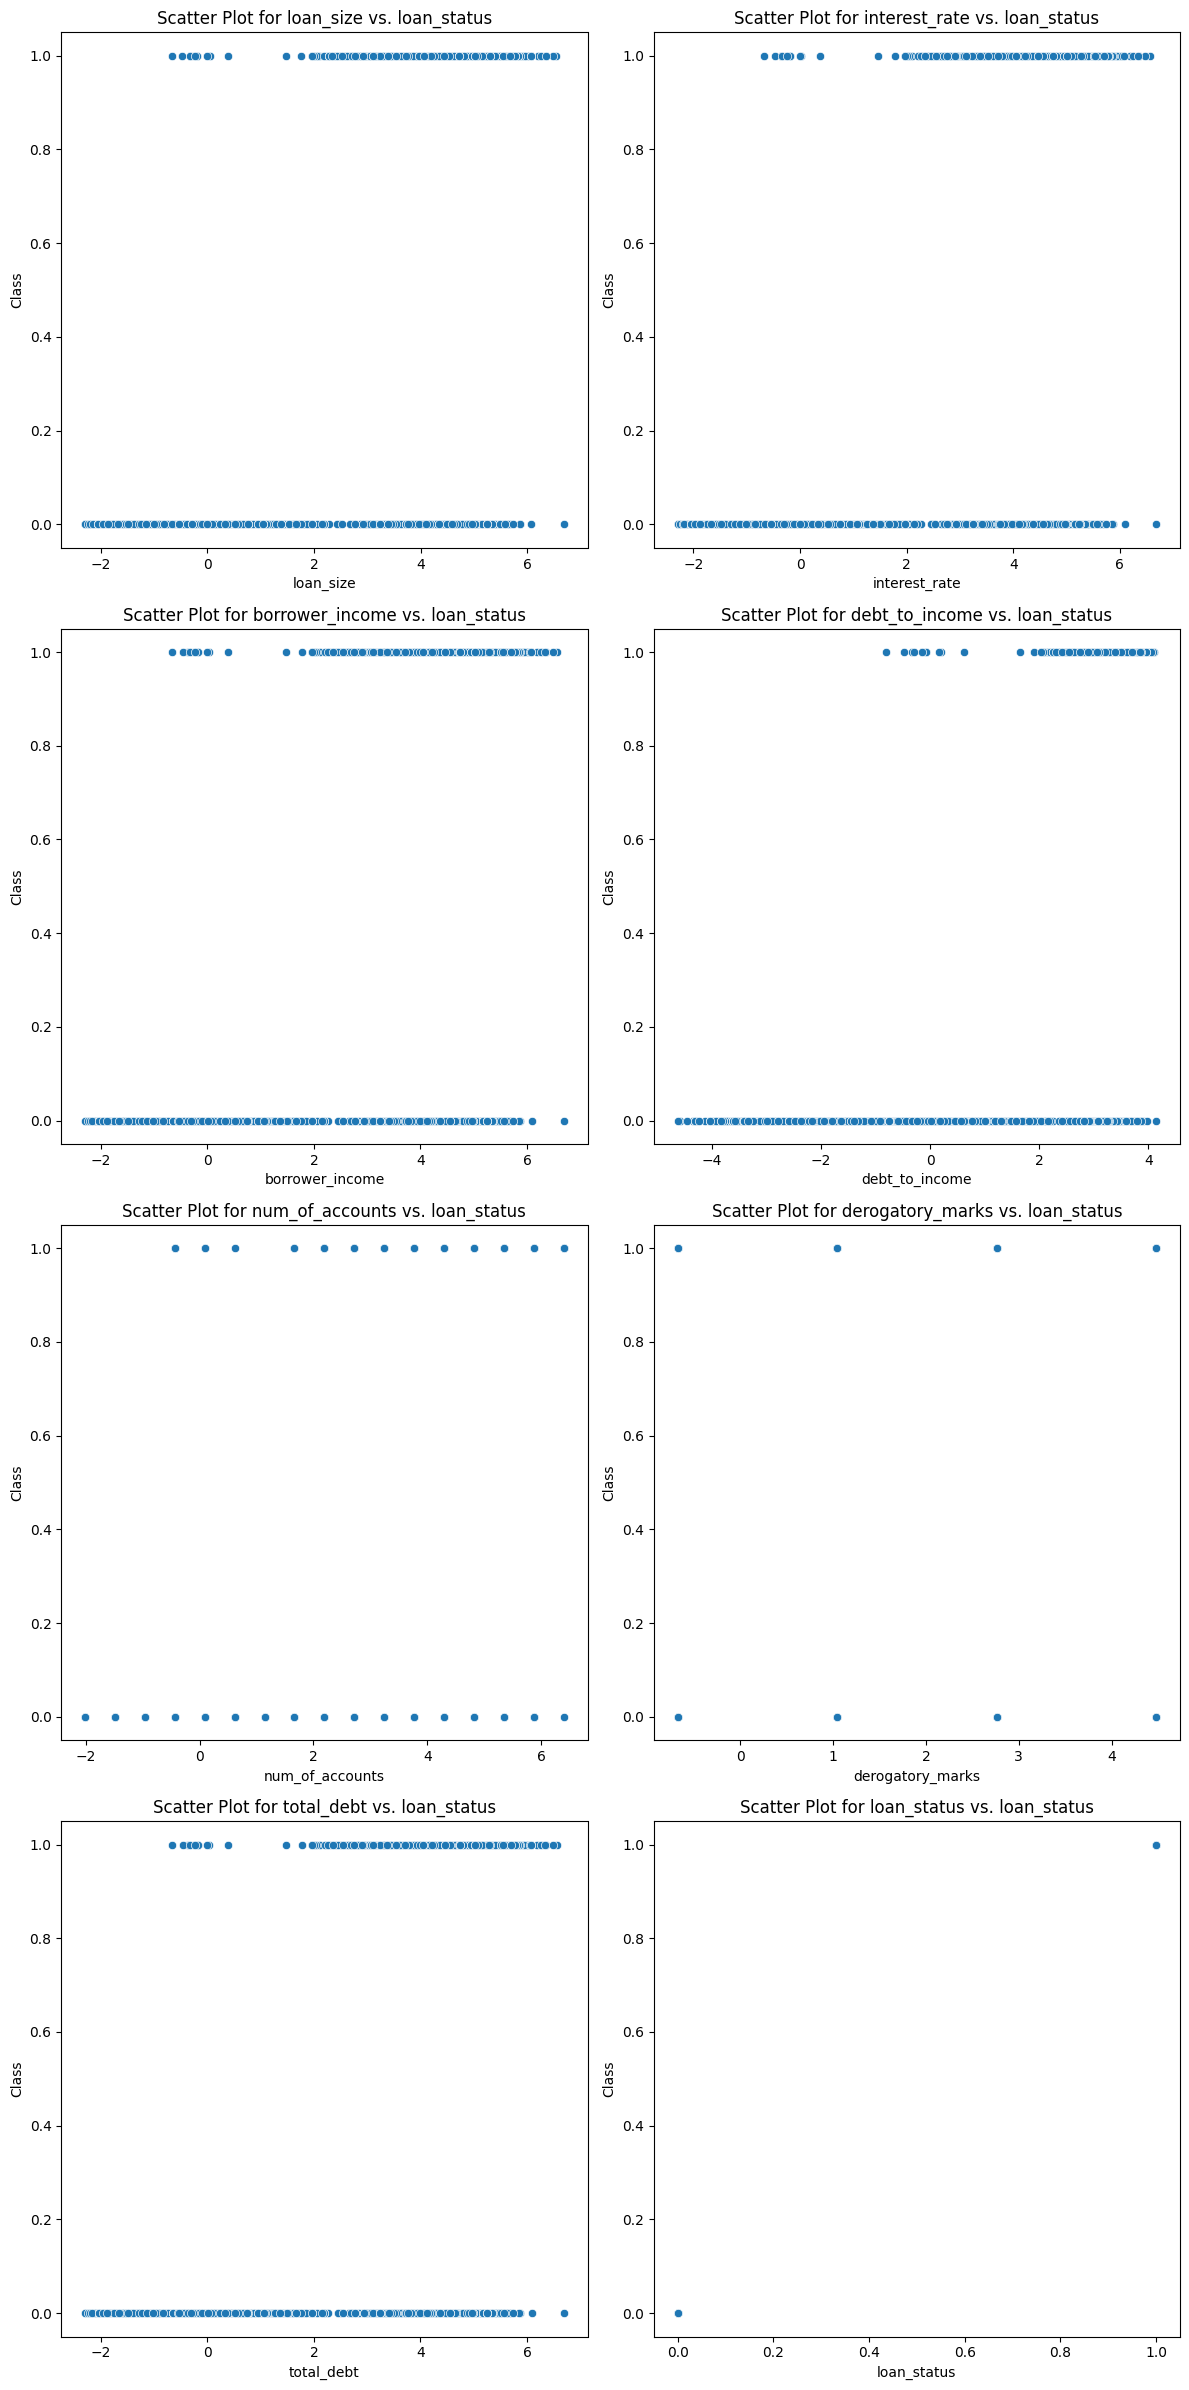

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
def plot(X):
    features = X.columns
    num_features = len(features)
    rows = (num_features + 1) // 2
    cols = 2
    fig, axes = plt.subplots(rows, cols, figsize=(12, 6*rows))
    axes = axes.flatten()

    for i, feature in enumerate(features):
        sns.scatterplot(x=feature, y='loan_status', data=X, ax=axes[i])
        axes[i].set_title(f'Scatter Plot for {feature} vs. loan_status')
        axes[i].set_xlabel(feature)
        axes[i].set_ylabel('Class')

    if num_features % 2 != 0:
        fig.delaxes(axes[-1])

    plt.tight_layout()
    plt.show()

plot(data)
# this plots suggests that there are near to no outliers and we need to keep for sake for project

In [27]:
import pandas as pd
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

df = data.copy()

# Separate features and target
X = df.drop('loan_status', axis=1)
y = df['loan_status']

# Apply SMOTE to the data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Combine resampled features and target into a DataFrame
df_resampled = pd.DataFrame(X_resampled, columns=X.columns)
df_resampled['loan_status'] = y_resampled

# Update the original DataFrame in place
df = df_resampled

# Print the first few rows of the updated DataFrame
print(df.head())
print("Class distribution after resampling:")
print(df['loan_status'].value_counts())


   loan_size  interest_rate  borrower_income  debt_to_income  num_of_accounts  \
0   0.427304       0.426837         0.427404        0.668571         0.616143   
1  -0.671487      -0.674918        -0.671552       -0.802166        -0.434049   
2  -0.384846      -0.370249        -0.372922       -0.344424        -0.434049   
3   0.427304       0.417844         0.415459        0.655346         0.616143   
4   0.475078       0.456068         0.451295        0.694873         0.616143   

   derogatory_marks  total_debt  loan_status  
0          1.043996    0.427404            0  
1         -0.673973   -0.671552            0  
2         -0.673973   -0.372922            0  
3          1.043996    0.415459            0  
4          1.043996    0.451295            0  
Class distribution after resampling:
loan_status
0    75036
1    75036
Name: count, dtype: int64


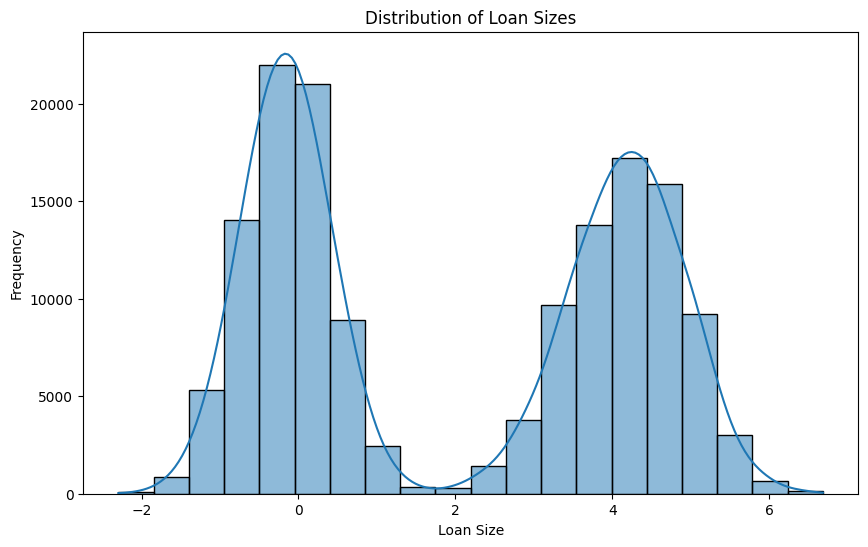

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10, 6))
sns.histplot(df['loan_size'], kde=True, bins=20)
plt.title('Distribution of Loan Sizes')
plt.xlabel('Loan Size')
plt.ylabel('Frequency')
plt.show()


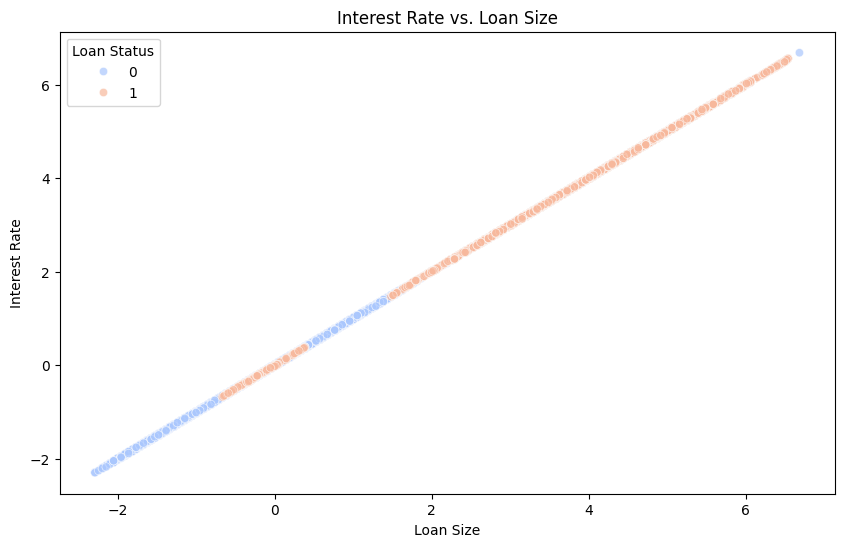

In [29]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='loan_size', y='interest_rate', hue='loan_status', palette='coolwarm', alpha=0.7)
plt.title('Interest Rate vs. Loan Size')
plt.xlabel('Loan Size')
plt.ylabel('Interest Rate')
plt.legend(title='Loan Status')
plt.show()


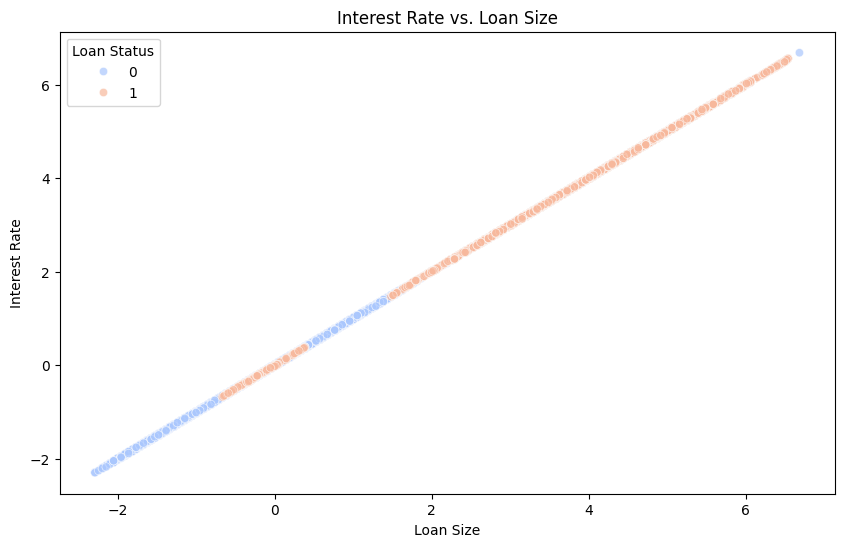

In [30]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='loan_size', y='interest_rate', hue='loan_status', palette='coolwarm', alpha=0.7)
plt.title('Interest Rate vs. Loan Size')
plt.xlabel('Loan Size')
plt.ylabel('Interest Rate')
plt.legend(title='Loan Status')
plt.show()


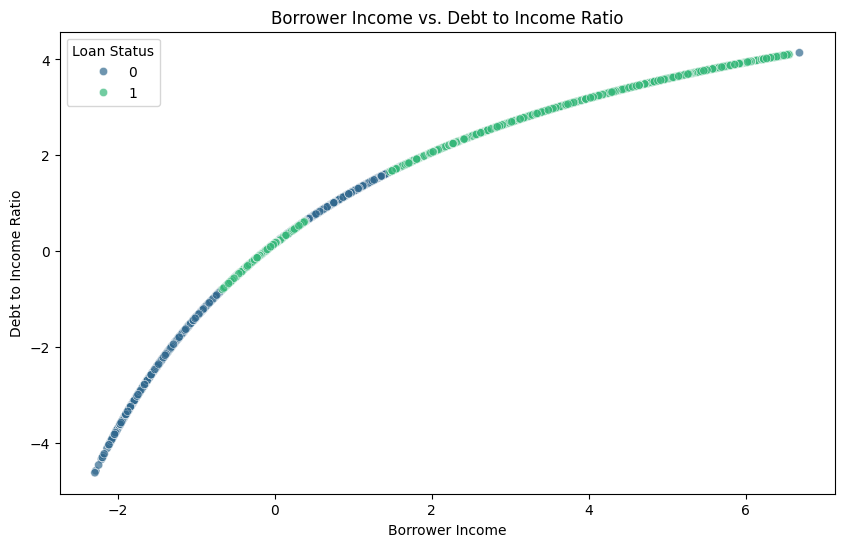

In [31]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='borrower_income', y='debt_to_income', hue='loan_status', palette='viridis', alpha=0.7)
plt.title('Borrower Income vs. Debt to Income Ratio')
plt.xlabel('Borrower Income')
plt.ylabel('Debt to Income Ratio')
plt.legend(title='Loan Status')
plt.show()


/var/folders/r2/_zqwhs3s7zd_mvl3kt6zzfsr0000gn/T/ipykernel_8659/2286484500.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='num_of_accounts', y='loan_size', palette='Set3')


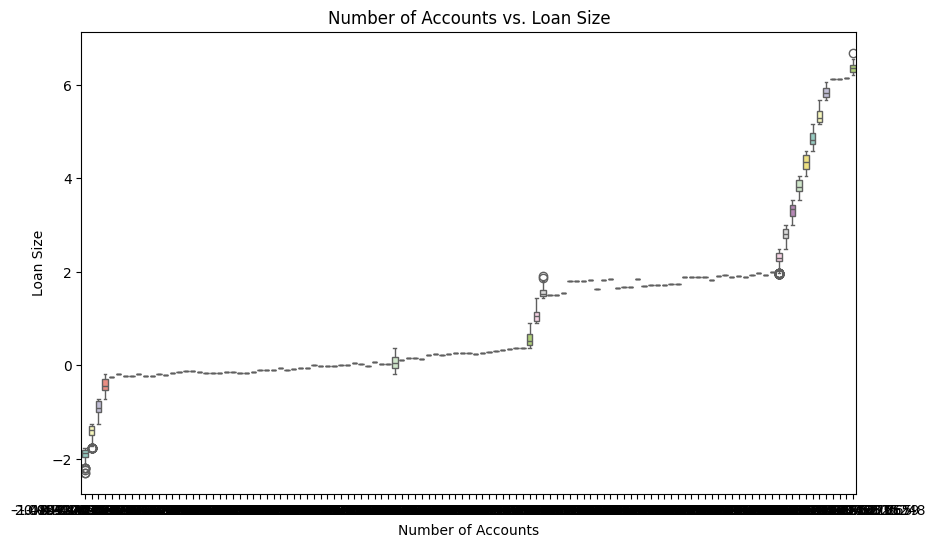

In [32]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='num_of_accounts', y='loan_size', palette='Set3')
plt.title('Number of Accounts vs. Loan Size')
plt.xlabel('Number of Accounts')
plt.ylabel('Loan Size')
plt.show()


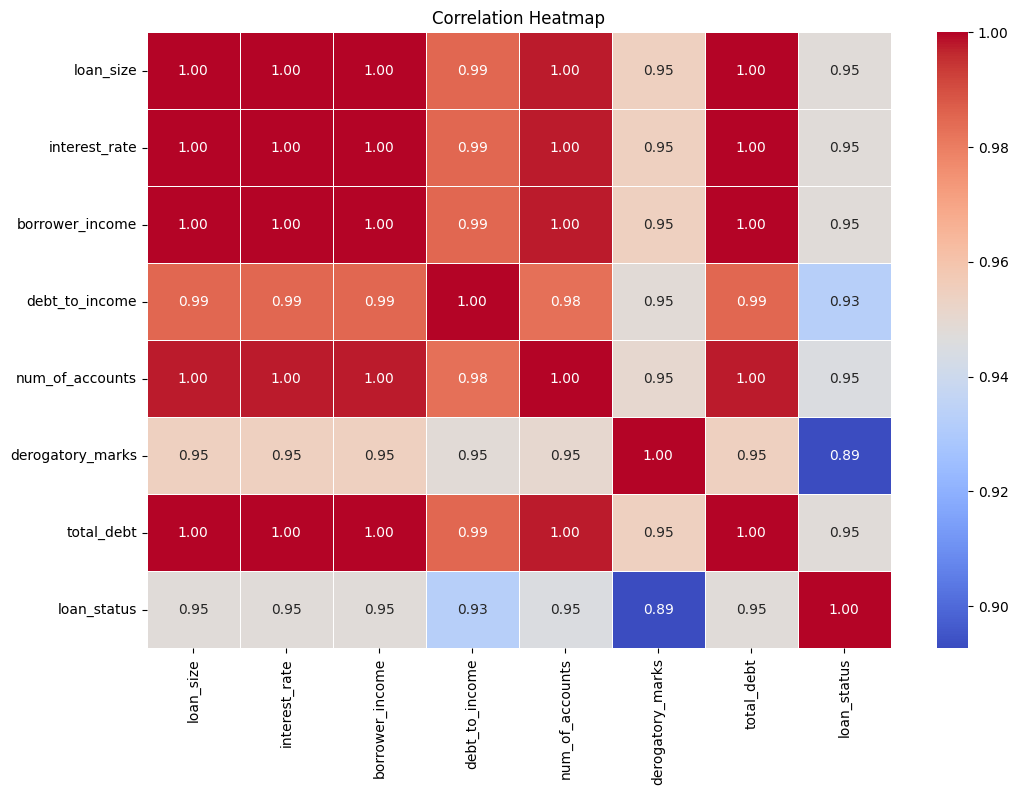

In [33]:
plt.figure(figsize=(12, 8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


/var/folders/r2/_zqwhs3s7zd_mvl3kt6zzfsr0000gn/T/ipykernel_8659/3785150759.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='loan_status', palette='pastel')


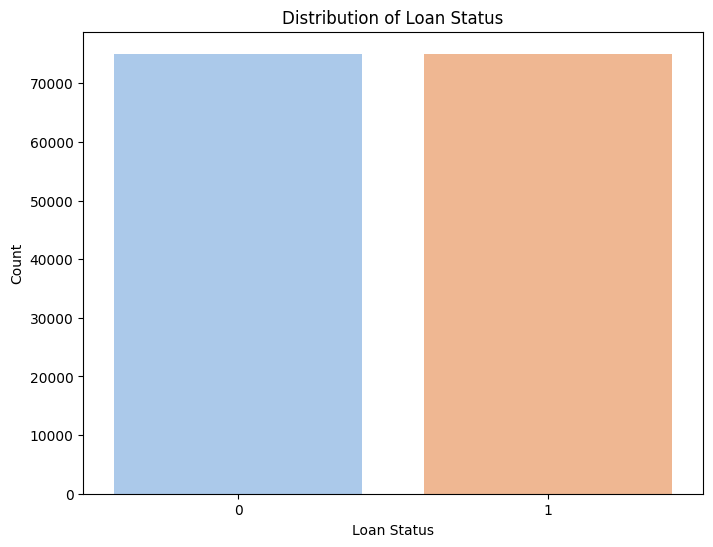

In [34]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='loan_status', palette='pastel')
plt.title('Distribution of Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()


In [35]:
df.describe()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
count,150072.000000,150072.000000,150072.000000,150072.000000,150072.000000,150072.000000,150072.000000,150072.000000
mean,2.010922,2.011026,2.010991,1.560909,1.987354,1.465854,2.010991,0.500000
std,2.267668,2.267775,2.267738,1.788620,2.247293,1.755241,2.267738,0.500002
min,-2.295787,-2.296073,-2.296096,-4.628640,-2.009337,-0.673973,-2.296096,0.000000
25%,-0.145978,-0.163389,-0.157909,-0.044436,0.091047,-0.673973,-0.157909,0.000000
50%,1.966253,1.974848,1.975338,2.042095,2.191430,1.043996,1.975338,0.500000
75%,4.201413,4.198547,4.202080,3.278198,4.291814,2.761965,4.202080,1.000000
max,6.685636,6.680987,6.686676,4.140328,6.392198,4.479933,6.686676,1.000000


In [36]:
df.corr()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
loan_size,1.000000,0.999982,0.999980,0.985284,0.997714,0.954557,0.999980,0.947864
interest_rate,0.999982,1.000000,0.999999,0.985301,0.997722,0.954596,0.999999,0.947870
borrower_income,0.999980,0.999999,1.000000,0.985303,0.997720,0.954593,1.000000,0.947869
debt_to_income,0.985284,0.985301,0.985303,1.000000,0.982925,0.948076,0.985303,0.932831
num_of_accounts,0.997714,0.997722,0.997720,0.982925,1.000000,0.950214,0.997720,0.945236
derogatory_marks,0.954557,0.954596,0.954593,0.948076,0.950214,1.000000,0.954593,0.892659
total_debt,0.999980,0.999999,1.000000,0.985303,0.997720,0.954593,1.000000,0.947869
loan_status,0.947864,0.947870,0.947869,0.932831,0.945236,0.892659,0.947869,1.000000


In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

X = df[data.columns.drop('loan_status')]
y = df['loan_status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#100 iteration gives same accuracy as 1lakh iterations
logistic_reg = LogisticRegression(max_iter=100, multi_class='multinomial', solver='lbfgs')


logistic_reg.fit(X_train, y_train)
y_pred = logistic_reg.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)
# ct(y_pred,y_test) # islp package shows good confusion table

/Users/suryanshpatel/Projects/PDS/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy: 0.9954022988505747
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     14983
           1       0.99      1.00      1.00     15032

    accuracy                           1.00     30015
   macro avg       1.00      1.00      1.00     30015
weighted avg       1.00      1.00      1.00     30015

Confusion Matrix:
[[14902    81]
 [   57 14975]]


In [38]:
from sklearn.neighbors import KNeighborsClassifier


no_of_neigh = 15 # no of neighbours
knn = KNeighborsClassifier(n_neighbors=no_of_neigh)
knn.fit(X_train , y_train)
y_pred_knn = knn.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Classification Report:")
print(classification_report(y_test, y_pred_knn))

confusion_matrix(y_test, y_pred_knn )

Accuracy: 0.9964017991004498
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     14983
           1       0.99      1.00      1.00     15032

    accuracy                           1.00     30015
   macro avg       1.00      1.00      1.00     30015
weighted avg       1.00      1.00      1.00     30015



array([[14907,    76],
       [   32, 15000]])

In [39]:
#save cleaned data
df.to_csv('/Users/suryanshpatel/Projects/PDS/credit-card-risk/data-clean/data.csv')